# Project 12 -- Dwijen Chawra

## Question 1

In [17]:
library(tidyverse)
dat <- read_csv("/anvil/projects/tdm/data/consumer_complaints/processed.csv")

New names:
• `` -> `...1`
Rows: 1296353 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): date_received, product, sub_product, issue, sub_issue, consumer_co...
dbl  (2): ...1, complaint_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [18]:
glimpse(dat)

Rows: 1,296,353
Columns: 19
$ ...1                         <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,…
$ date_received                <chr> "05/30/2019", "05/30/2019", "05/30/2019",…
$ product                      <chr> "Credit reporting; credit repair services…
$ sub_product                  <chr> "Credit reporting", "Checking account", "…
$ issue                        <chr> "Incorrect information on your report", "…
$ sub_issue                    <chr> "Old information reappears or never goes …
$ consumer_complaint_narrative <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ company_public_response      <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ company                      <chr> "Statewide Credit Services Corp.", "NAVY …
$ state                        <chr> "PA", "MD", "OR", "AL", "IL", "OH", "NC",…
$ zip                          <chr> "170XX", "20746", "973XX", NA, "606XX", "…
$ tags                         <chr> "Older American", NA, NA, NA, "Older Amer…
$ consumer_c

The data in the "date sent to company" columns and the "date received" columns is all characters right now, but they are both formatted as dates. I do not think it is in the right format right now, but we can convert them to proper dates and drop the unclean dates.

## Question 2

In [19]:
library(lubridate)

# convert date_received and date_sent_to_company to date format.
# they are in the format mm/dd/yyyy
dat$date_received <- mdy(dat$date_received)
dat$date_sent_to_company <- mdy(dat$date_sent_to_company)

glimpse(dat)

Rows: 1,296,353
Columns: 19
$ ...1                         <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,…
$ date_received                <date> 2019-05-30, 2019-05-30, 2019-05-30, 2019…
$ product                      <chr> "Credit reporting; credit repair services…
$ sub_product                  <chr> "Credit reporting", "Checking account", "…
$ issue                        <chr> "Incorrect information on your report", "…
$ sub_issue                    <chr> "Old information reappears or never goes …
$ consumer_complaint_narrative <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ company_public_response      <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ company                      <chr> "Statewide Credit Services Corp.", "NAVY …
$ state                        <chr> "PA", "MD", "OR", "AL", "IL", "OH", "NC",…
$ zip                          <chr> "170XX", "20746", "973XX", NA, "606XX", "…
$ tags                         <chr> "Older American", NA, NA, NA, "Older Amer…
$ consumer_c

## Question 3

In [20]:
dat <- dat %>% 
  mutate(wait_time = difftime(dat$date_sent_to_company, dat$date_received, units = "days"))

glimpse(dat)

Rows: 1,296,353
Columns: 20
$ ...1                         <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,…
$ date_received                <date> 2019-05-30, 2019-05-30, 2019-05-30, 2019…
$ product                      <chr> "Credit reporting; credit repair services…
$ sub_product                  <chr> "Credit reporting", "Checking account", "…
$ issue                        <chr> "Incorrect information on your report", "…
$ sub_issue                    <chr> "Old information reappears or never goes …
$ consumer_complaint_narrative <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ company_public_response      <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ company                      <chr> "Statewide Credit Services Corp.", "NAVY …
$ state                        <chr> "PA", "MD", "OR", "AL", "IL", "OH", "NC",…
$ zip                          <chr> "170XX", "20746", "973XX", NA, "606XX", "…
$ tags                         <chr> "Older American", NA, NA, NA, "Older Amer…
$ consumer_c

## Question 4

In [21]:
# display stats for wait_time
summary(dat$wait_time)
mean(dat$wait_time)
median(dat$wait_time)
max(dat$wait_time)

print("Broken down by submitted_via")
wait_time_stats <- data.frame()

for (cat in unique(dat$submitted_via)) {
    for (timely in unique(dat$timely_response)) {
        print(cat)
        print(mean(dat[dat$submitted_via == cat,]$wait_time))
        print(median(dat[dat$submitted_via == cat,]$wait_time))
        print(max(dat[dat$submitted_via == cat,]$wait_time))
        print(nrow(dat[dat$submitted_via == cat,]))

        timely_df <- dat[dat$submitted_via == cat & dat$timely_response == timely,]
        
        temp <- data.frame(submitted_via = cat,
                        mean_wait_time = mean(timely_df$wait_time),
                        median_wait_time = median(timely_df$wait_time),
                        max_wait_time = max(timely_df$wait_time),
                        n = nrow(timely_df),
                        timely = timely)
        wait_time_stats <- rbind(wait_time_stats, temp)
    }
}


wait_time_stats

  Length    Class     Mode 
 1296353 difftime  numeric 

Time difference of 3.162897 days

Time difference of 0 days

Time difference of 1962 days

[1] "Broken down by submitted_via"
[1] "Web"
Time difference of 2.294994 days
Time difference of 0 days
Time difference of 1962 days
[1] 956918
[1] "Web"
Time difference of 2.294994 days
Time difference of 0 days
Time difference of 1962 days
[1] 956918
[1] "Phone"
Time difference of 4.176102 days
Time difference of 1 days
Time difference of 1019 days
[1] 77245
[1] "Phone"
Time difference of 4.176102 days
Time difference of 1 days
Time difference of 1019 days
[1] 77245
[1] "Referral"
Time difference of 5.808233 days
Time difference of 3 days
Time difference of 1601 days
[1] 174785
[1] "Referral"
Time difference of 5.808233 days
Time difference of 3 days
Time difference of 1601 days
[1] 174785
[1] "Postal mail"
Time difference of 7.005225 days
Time difference of 2 days
Time difference of 1188 days
[1] 67949
[1] "Postal mail"
Time difference of 7.005225 days
Time difference of 2 days
Time difference of 1188 days
[1] 67949
[1] "Fax"
Time difference of 4.584544 days
Time difference of 1 day

submitted_via,mean_wait_time,median_wait_time,max_wait_time,n,timely
<chr>,<drtn>,<drtn>,<drtn>,<int>,<chr>
Web,2.194970 days,0 days,1962 days,931712,Yes
Web,5.992264 days,0 days,1133 days,25206,No
Phone,4.027386 days,1 days,1019 days,75001,Yes
Phone,9.146613 days,3 days,587 days,2244,No
Referral,5.767980 days,3 days,1601 days,171524,Yes
Referral,7.925483 days,3 days,564 days,3261,No
Postal mail,6.950344 days,2 days,1188 days,66719,Yes
Postal mail,9.982114 days,3 days,489 days,1230,No
Fax,4.525889 days,1 days,1754 days,18618,Yes


Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


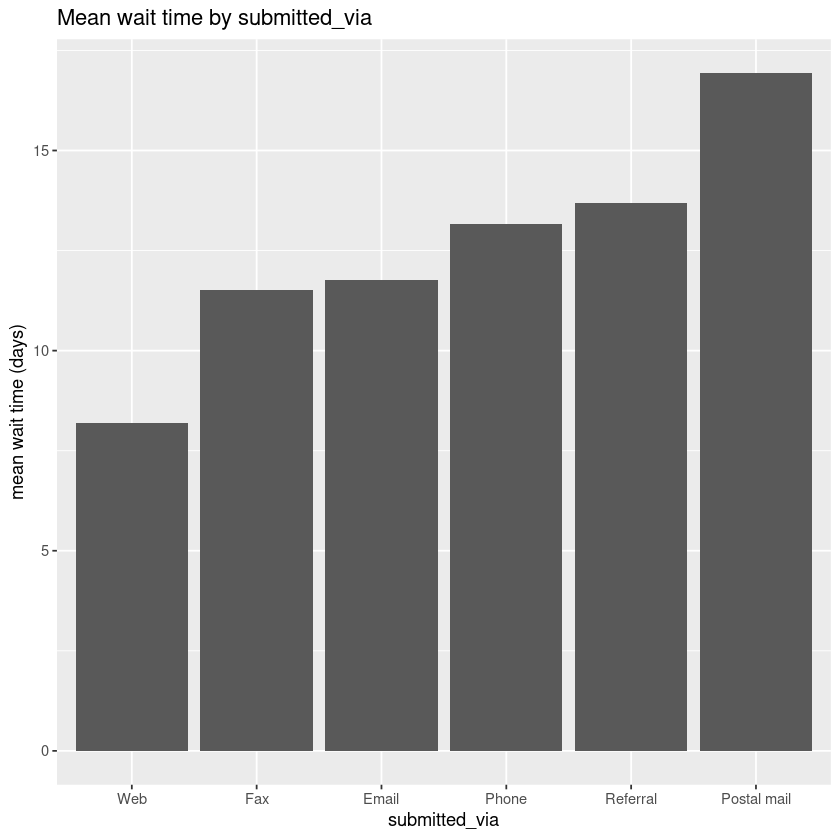

In [22]:
wait_time_bar <- ggplot(wait_time_stats, aes(x = reorder(submitted_via, mean_wait_time, ), y = mean_wait_time)) +
  geom_bar(stat = "identity") +
  labs(title = "Mean wait time by submitted_via",
       x = "submitted_via",
       y = "mean wait time (days)")

wait_time_bar

I picked this analysis, using the mean of the data because I knew that the median would be heavily affected by the sheer quantity of complaints with a 0 day wait time. By using the mean, we are able to see the full range of the numbers and where the skew lies, in one number.

## Based on the average wait time in the bar chart, using the Web submission interface would be the fastest way to get a response from the company.

## Question 5

Time difference of 3.075543 days
Time difference of 6.570018 days
[1] "Web"
Time difference of 2.19497 days
Time difference of 5.992264 days
[1] "Phone"
Time difference of 4.027386 days
Time difference of 9.146613 days
[1] "Referral"
Time difference of 5.76798 days
Time difference of 7.925483 days
[1] "Postal mail"
Time difference of 6.950344 days
Time difference of 9.982114 days
[1] "Fax"
Time difference of 4.525889 days
Time difference of 6.984615 days
[1] "Email"
Time difference of 7.654155 days
Time difference of 4.1 days


Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


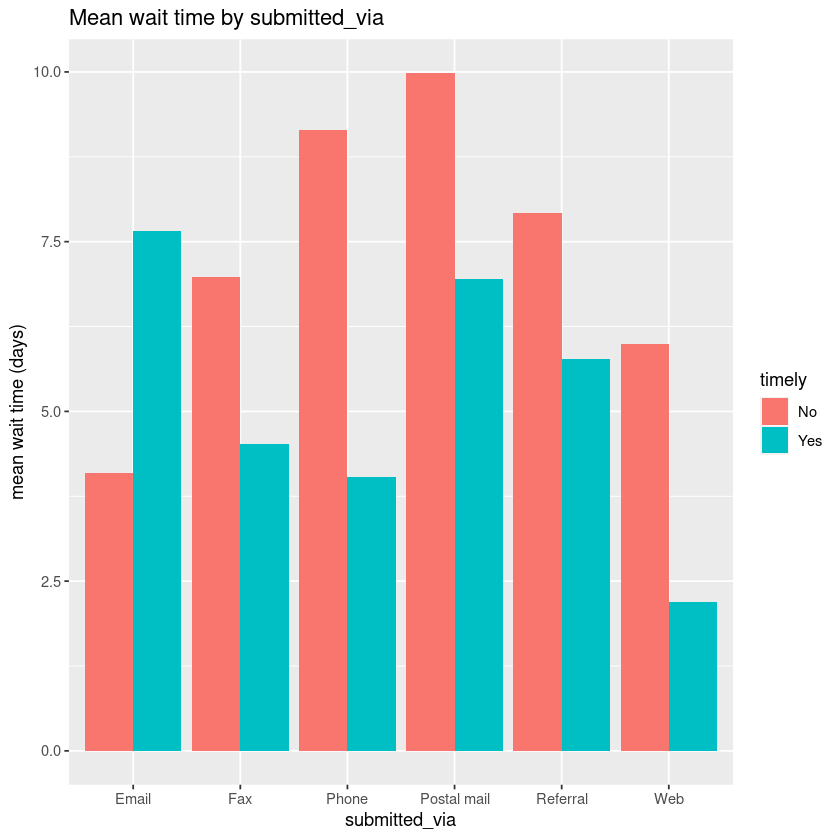

In [23]:
timely_responses = dat[dat$timely_response == "Yes",]
late_responses = dat[dat$timely_response == "No",]
# glimpse(late_responses)

print(mean(timely_responses$wait_time))
print(mean(late_responses$wait_time, na.rm = TRUE))

for (cat in unique(dat$submitted_via)) {
    print(cat)
    print(mean(timely_responses[timely_responses$submitted_via == cat,]$wait_time))
    print(mean(late_responses[late_responses$submitted_via == cat,]$wait_time, na.rm = TRUE))
}

# make a double bar graph of two bars next to each other, one for timely responses and one for late responses


wait_time_bar <- ggplot(wait_time_stats, aes(x = submitted_via, fill = timely, y = mean_wait_time)) +
  geom_bar(stat = "identity", position="dodge") +
  labs(title = "Mean wait time by submitted_via",
       x = "submitted_via",
       y = "mean wait time (days)")
wait_time_bar


#### I do not think this timely_response column is useful to the customer, considering that the raw numerical values are there for analysis. The timely_response column is not accurate for the email category, and the mean response time is lower for the supposed non-timely responses. I believe it would be better to use the raw numbers without relying on the timely_response column.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.